Reference : https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

Dataset : https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv



In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Masukkan Dataset

In [0]:
data = pd.read_csv('./sample_data/banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(8840, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


Keterangan :

*   Ada 41188 baris, jumlah record data
*   Dan 21 kolom variabel data

In [0]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1.0


**LIHAT :**

pada kolom variabel `Y` -> ("0" = "No", "1" = "Yes") 

Merupakan variabel yang berisi prediksi apakah nasabah mau melakukan pinjaman atau tidak.

# Normalisasi variabel

Pada kolom education terdapat beberapa kategori yang hampir sama didalamnya. Kita lakukan normalisasi dengan menggabungkan kategori yang sama.

In [0]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [0]:
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])

In [0]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# Eksplorasi Data 

Sekarang kita coba visualisasikan jumlah nasabah yang di `menerima` dan `tidak` untuk pengajuan deposit

In [0]:
data['y'].value_counts()

0.0    7843
1.0     997
Name: y, dtype: int64

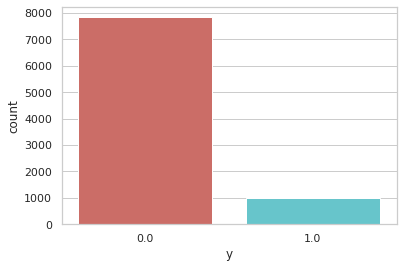

<Figure size 432x288 with 0 Axes>

In [0]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')



---

Kemudian kita coba hitung `persentase` perbandingan antara nasabah yang menerima dan tidak

In [0]:
count_no_sub = len(data[data['y'] == 0])
count_sub = len(data[data['y'] == 1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Percentage of Subscription", pct_of_sub * 100)

Percentage of no subscription is 88.72171945701356
Percentage of Subscription 11.278280542986426


Hasil persentase menunjukkan TIDAK SEIMBANG

dengan jumlah perbandingan 89:11


---

Mari kita coba lihat dari pengelompokkan pada setiap variabel berdasarkan `Y`

In [0]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0.0,39.775469,221.331888,2.636364,983.69374,0.135662,0.250312,93.606047,-40.642012,3.806136,5176.142560
1.0,40.413240,542.130391,2.012036,793.89669,0.509529,-1.261886,93.377747,-40.076830,2.076707,5092.090471


Keterangan :


*   Rata-rata usia yang menerima deposit lebih tinggi dibandingkan rata-rat usia yang menolak pinjaman.
*   variabel `pdays` -> hari terakhir melakukan contact via telephon. semakin sedikit jarak antara panggilan telephone terakhir, maka semakin meningkatkan customer untuk melakukan pinjaman.
*   Jumlah panggilan selama kampanye justru lebih rendah untuk customer yang menerima pinjaman.


---

Mari kita coba lihat dari pengelompokkan pada setiap variabel berdasarkan `JOB` , `MARITAL` , `EDUCATION`

In [0]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,37.978752,252.000885,2.561753,953.752988,0.195219,0.018282,93.541397,-40.417530,3.542137,5163.703320,0.132802
blue-collar,39.410825,262.131959,2.610309,986.208247,0.121134,0.221856,93.654556,-41.479948,3.731928,5174.827423,0.072165
entrepreneur,41.768489,265.842444,2.700965,973.498392,0.147910,0.167524,93.626675,-41.037299,3.813347,5175.028939,0.086817
housemaid,45.217391,273.772947,2.632850,979.811594,0.106280,0.431401,93.677454,-40.024155,3.985609,5180.124638,0.111111
management,42.101190,240.269345,2.452381,953.162202,0.220238,-0.068601,93.492238,-40.271131,3.563732,5164.906101,0.108631
retired,61.332402,270.773743,2.391061,907.424581,0.321229,-0.545251,93.464651,-38.637709,2.927159,5129.662570,0.256983
self-employed,39.570533,278.197492,2.833856,974.084639,0.181818,0.013480,93.549492,-40.775549,3.608959,5167.512226,0.100313
services,38.071596,251.097418,2.529343,983.853286,0.127934,0.212441,93.656453,-41.250822,3.735918,5172.817606,0.078638
student,26.108696,294.358696,2.114130,858.945652,0.510870,-1.373370,93.360179,-40.844022,1.872668,5084.396196,0.342391


In [0]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.582719,251.258166,2.569020,970.730242,0.182297,0.113172,93.584650,-40.895153,3.662192,5170.139410,0.101159
married,42.110112,259.428090,2.571910,966.465918,0.165918,0.181554,93.603672,-40.344438,3.733643,5171.292491,0.104682
single,33.326241,255.989362,2.552009,950.539795,0.200552,-0.144169,93.529425,-40.955319,3.336930,5155.786879,0.133964
unknown,37.846154,224.538462,2.615385,923.384615,0.307692,-0.453846,93.593769,-39.884615,3.061692,5134.538462,0.153846


In [0]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.003019,266.812075,2.601132,975.775472,0.139623,0.153019,93.635331,-40.971472,3.689068,5170.698151,0.093585
high.school,37.900049,255.898080,2.566716,967.266864,0.179714,0.078434,93.601077,-41.077006,3.587398,5166.107730,0.098966
illiterate,48.000000,482.500000,2.000000,999.000000,0.000000,-0.200000,93.259500,-41.600000,3.187000,5163.600000,0.500000
professional.course,40.142730,258.354610,2.597518,962.072695,0.160461,0.238298,93.570503,-40.061968,3.782045,5173.877660,0.109929
university.degree,38.628368,246.433009,2.513099,948.081587,0.213323,-0.061901,93.499510,-40.118750,3.482225,5160.970808,0.139222
unknown,43.070028,276.669468,2.599440,940.647059,0.240896,0.104482,93.691003,-39.887115,3.593669,5159.692437,0.142857


# Visualisasi

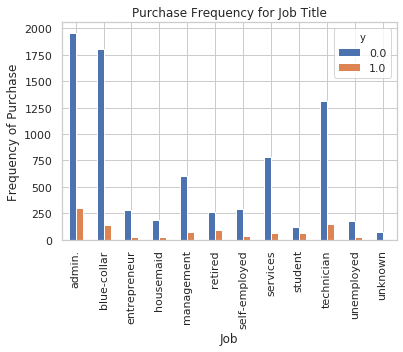

In [0]:
%matplotlib inline
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

Terlihat bagaimana frekuensi grafik cukup baik oleh karenanya kita dapat simpulkan bahwa Jabatan mempengaruhi hasil dari penjualan deposit. maka kita bisa menggunakan variabel `JOB` sebagai `Predictor Variabel`.

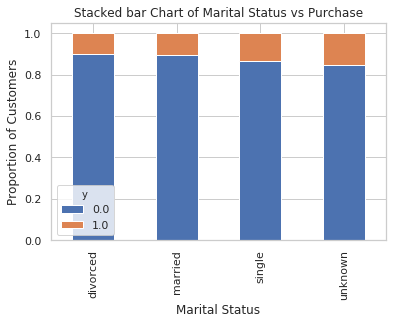

In [0]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_pu_stack')

Grafik yang tidak terlalu memperlihatkan frekuensi berdasarkan status. Oleh karenanya variabel `marital` tidak bisa kita gunakan sebagai Predictor Variabel.

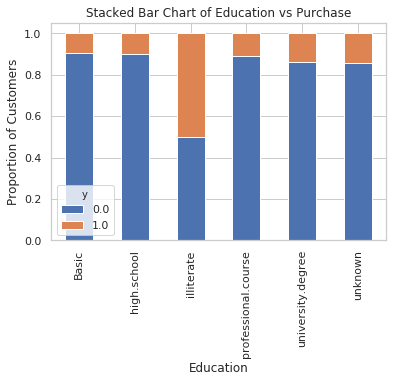

In [0]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Grafik terlihat lebih baik untuk frekuensi berdasarkan pendidikan. Maka kita bisa menggunakan variabel `Education` sebagai `Predictor Variabel`

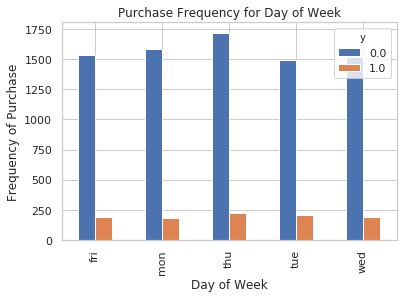

In [0]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Grafik tidak memperlihatkan perbedaan yang signifikan, jadi variabel `day_of_week` tidak bisa kita gunakan sebagai predictor variabel

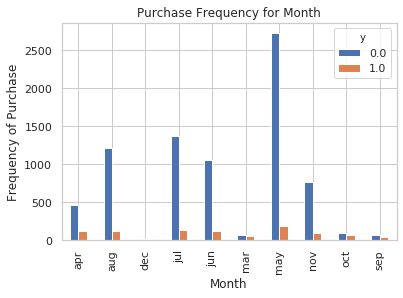

In [0]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Grafik terlihat frequencies untuk setiap bulannya. maka kita bisa gunakan variabel `month` sebagai `predictor variabel`.

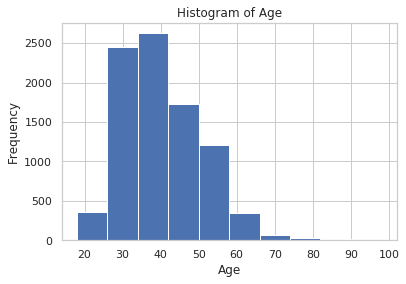

In [0]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Rata-rata customer yang melakukan peminjaman berusia atara 30-40 tahun

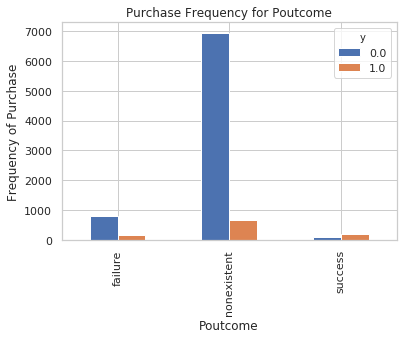

In [0]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Variabel `poutcome` -> hasil dari kampanye pemasaran ('gagal', 'tidak ada', 'sukses')

Terlihat perbedaan frequencies pada variabel poutcome. kita bisa gunakan `poutcome` sebagai `predictor variabel`.

# Membuat variabel dummy

In [0]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var, drop_first=True)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

In [0]:
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [0]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

# Perbanyak sampling dengan SMOTE

SMOTE algorithm (Synthetic Minority Oversampling Technique).



*   Membuat sample untuk kelas yang tidak melakukan pinjaman.
*   Memilih sampel secara acak dengan algortima KNN



Reference :

https://arxiv.org/pdf/1106.1813.pdf

In [0]:
from imblearn.over_sampling import SMOTE

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X,columns=columns )
os_data_y= pd.DataFrame(data = os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  10994
Number of no subscription in oversampled data 5497
Number of subscription 5497
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

# Recursive Feature Elimination (RFE)

RFE digunakan untuk memilih fitur dengan secara rekursif dengan mempertimbangkan nilai pada set fitur yang lebih kecil.


Reference = 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False  True False False False  True False False  True
 False  True  True False False  True False  True  True False False False
 False False  True  True  True  True False  True False  True False False
 False False  True  True  True  True False  True False False False False
 False False  True]
[17 23  8 27  1 13 15 14  1 19 10  1 24  1  1  7  9  1 28  1  1  3 18 26
 12 31  1  1  1  1 32  1 16  1 21  5 20 30  1  1  1  1 11  1 22 29  2  4
  6 25  1]


In [0]:
# cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
#       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
#       'month_may', 'month_nov', 'month_oct', 'poutcome_failure', 'poutcome_success'] 

cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_unknown', 
      'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', 'poutcome_success']
      
X=os_data_X[cols]
y=os_data_y['y']

# Implementasi Model

In [0]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.567853
         Iterations 15
                                      Results: Logit
Model:                        Logit                    Pseudo R-squared:         0.181     
Dependent Variable:           y                        AIC:                      12517.9458
Date:                         2020-03-03 11:39         BIC:                      12634.8275
No. Observations:             10994                    Log-Likelihood:           -6243.0   
Df Model:                     15                       LL-Null:                  -7620.5   
Df Residuals:                 10978                    LLR p-value:              0.0000    
Converged:                    1.0000                   Scale:                    1.0000    
No. Iterations:               15.0000                                                      
-------------------------------------------------------------------------------------------
                

In [0]:
# cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
#       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
#       'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 

cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown',
      'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.568893
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.179     
Dependent Variable: y                AIC:              12534.8267
Date:               2020-03-03 12:01 BIC:              12629.7931
No. Observations:   10994            Log-Likelihood:   -6254.4   
Df Model:           12               LL-Null:          -7620.5   
Df Residuals:       10981            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
euribor3m        -0.4057   0.0143 -28.3513 0.0000 -0.4338 -0.3777
job_blue-collar   0.0628   0.0576   1.0902 0.2756 -0.0501  0.1756


# Pengujian Model Dengan Regresi Logistik

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1241  393]
 [ 509 1156]]


Hasil menunjukkan :

1241 + 393 (hasil prediksi yang benar)
509 + 1156 (hasil prediksi yang salah)



---

Compute precision, recall, F-measure and support

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73      1634
         1.0       0.75      0.69      0.72      1665

    accuracy                           0.73      3299
   macro avg       0.73      0.73      0.73      3299
weighted avg       0.73      0.73      0.73      3299



Hasil Interpretasi : Akurasi sebesar `73%`

# Kurva ROC

ROC digunakan untuk pengklasifikasian biner. Garis putus-putus (dotted line) mewakili kurva ROC dari `random classifier`. Hasil klasifikasi yang baik adalah berada sejauh mungkin dari `dotted line` (dari bawah menuju sudut kiri atas).

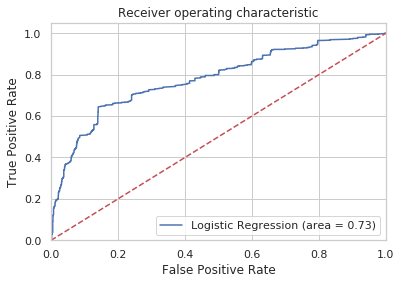

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()